In [1]:
import skimage
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import glob
from skimage import io
import seaborn as sns 
from skimage import color


from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve  
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix


In [24]:
path_o = "E:\semester7\English\Img\BadImag\Bmp\Sample051\*"

path_q = "E:\semester7\English\Img\BadImag\Bmp\Sample053\*"

In [25]:

path_o_paths =  glob.glob(  path_o )

path_q_paths =  glob.glob(  path_q )

In [26]:

print( len(path_o_paths  ))

print( len(path_q_paths  ))

110
2


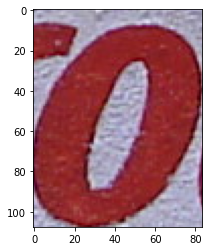

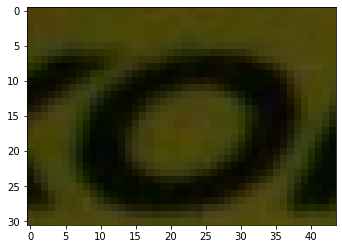

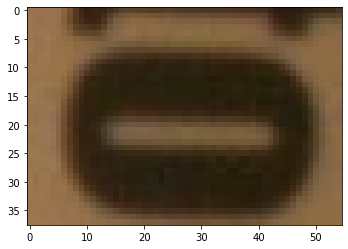

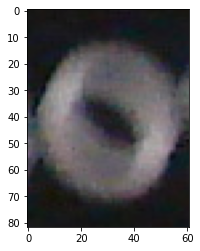

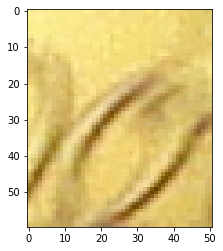

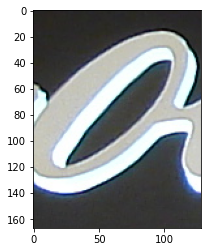

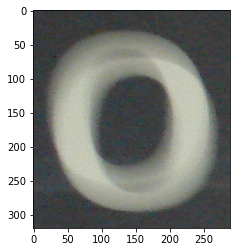

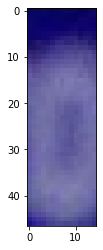

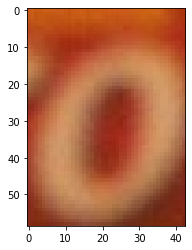

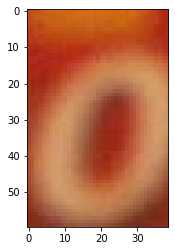

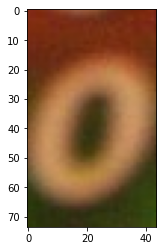

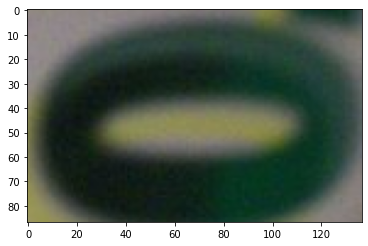

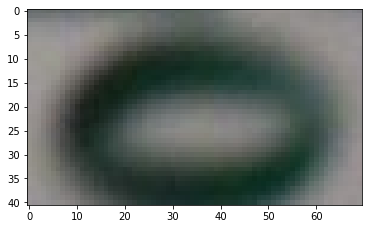

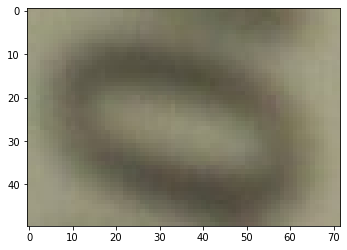

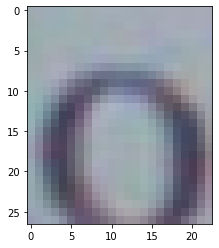

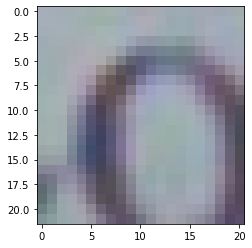

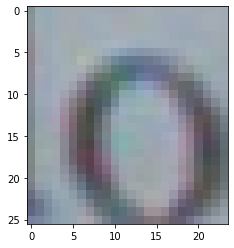

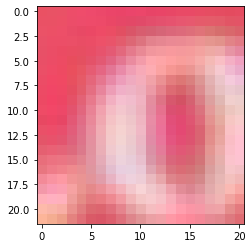

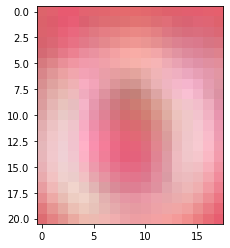

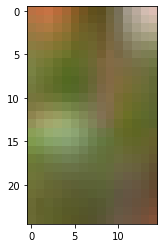

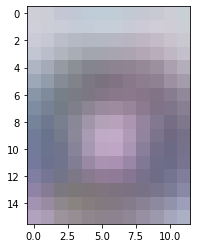

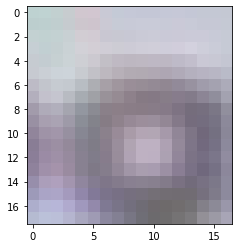

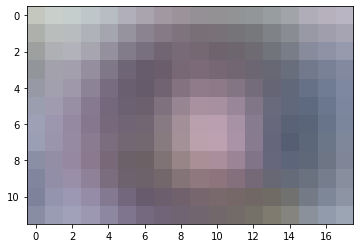

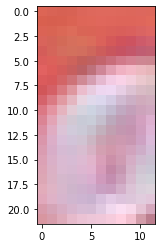

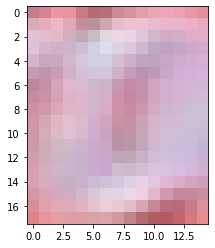

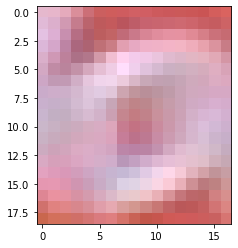

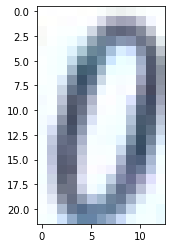

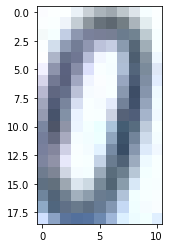

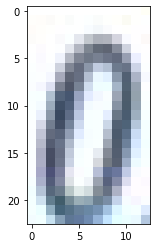

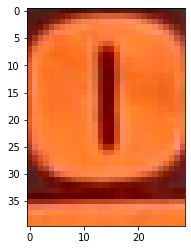

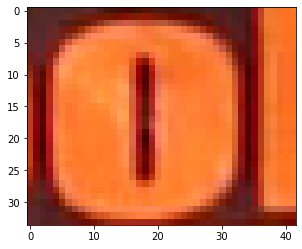

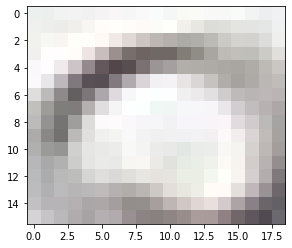

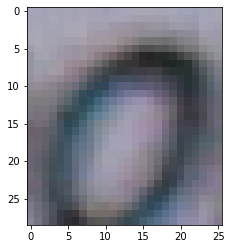

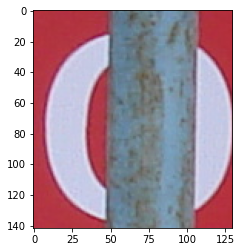

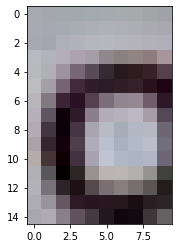

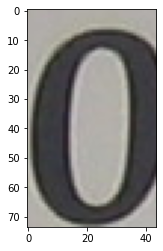

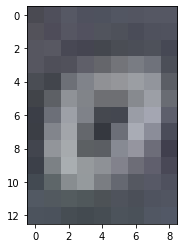

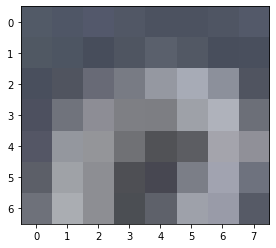

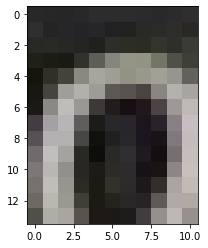

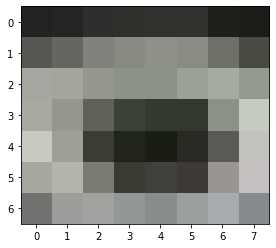

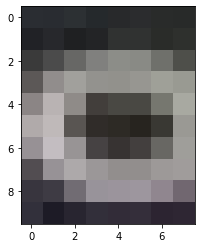

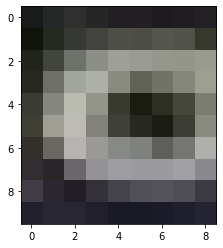

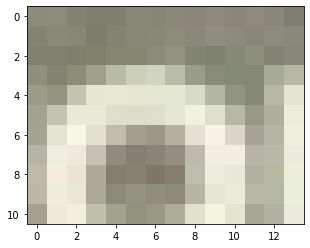

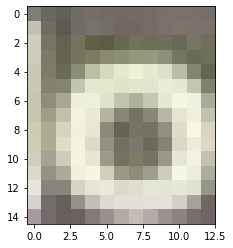

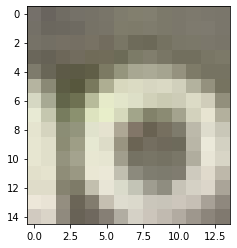

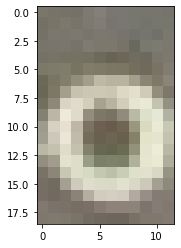

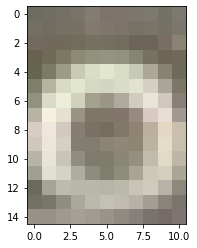

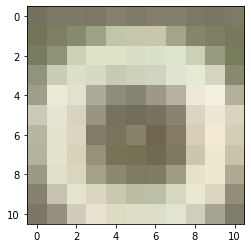

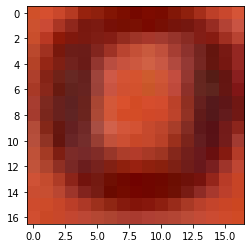

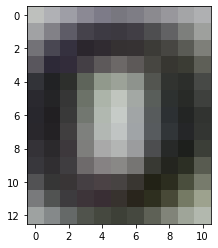

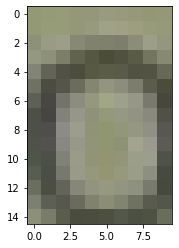

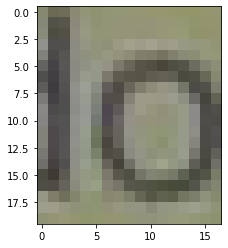

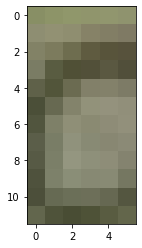

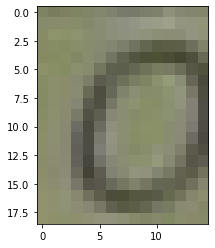

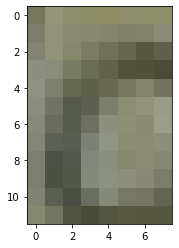

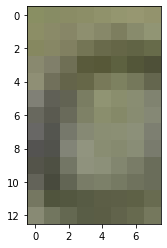

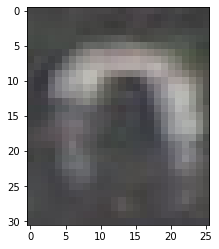

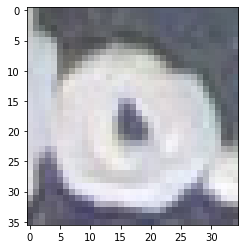

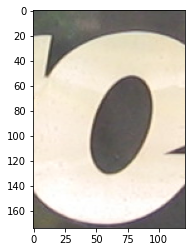

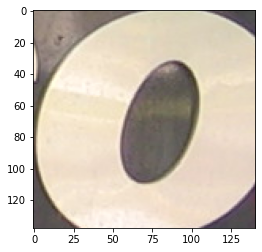

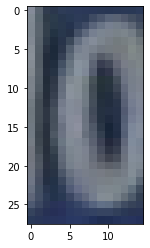

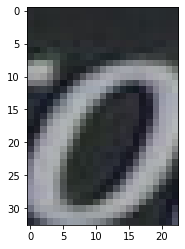

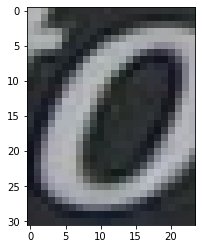

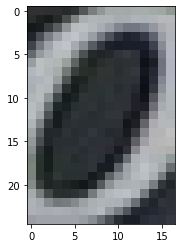

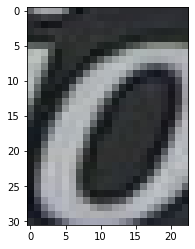

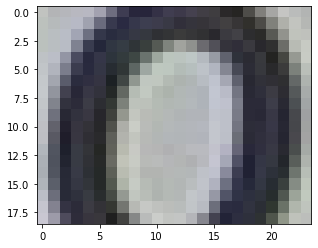

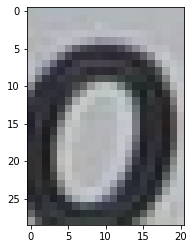

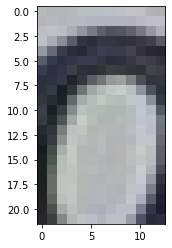

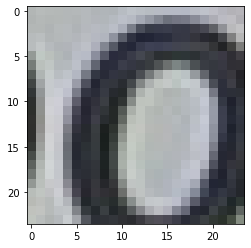

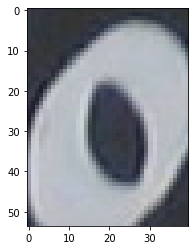

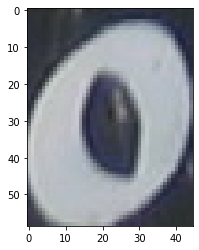

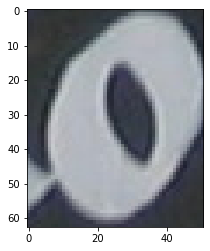

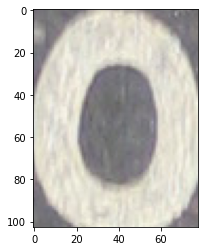

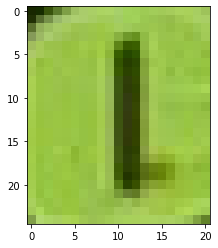

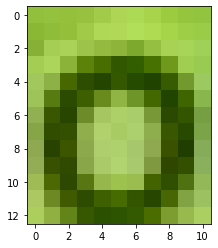

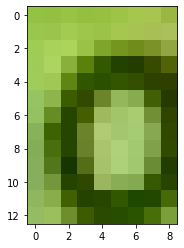

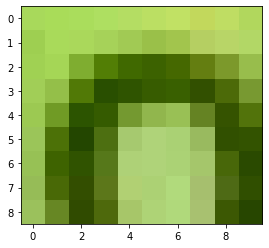

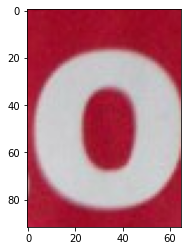

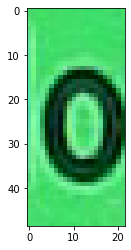

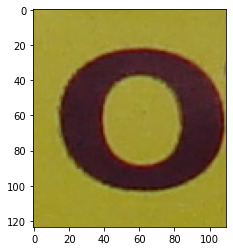

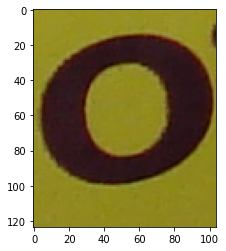

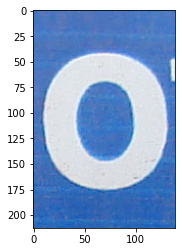

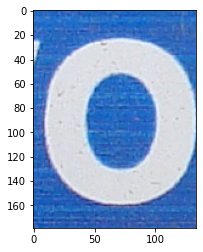

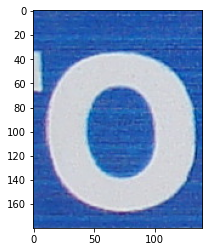

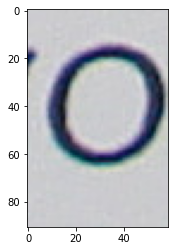

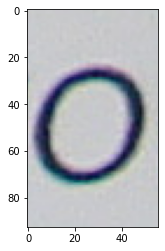

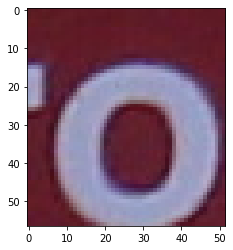

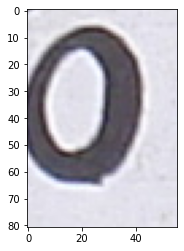

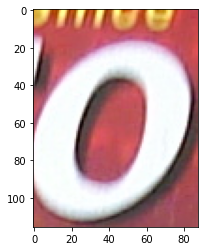

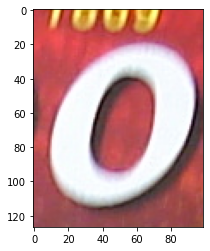

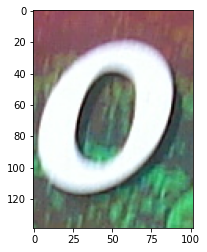

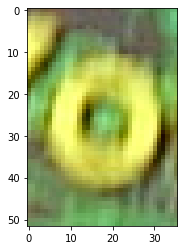

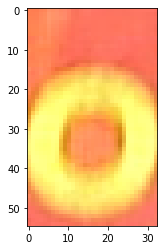

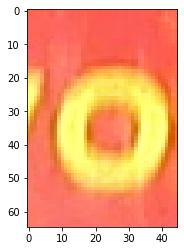

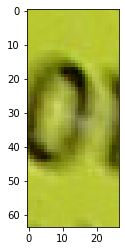

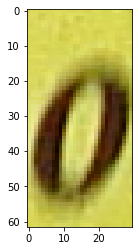

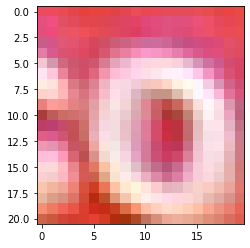

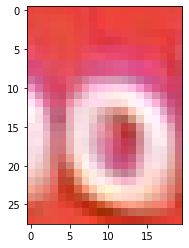

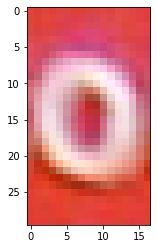

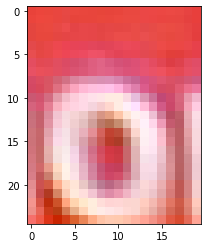

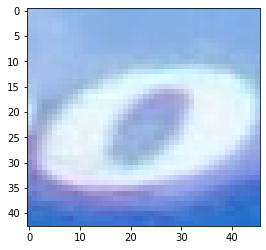

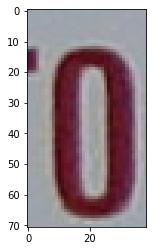

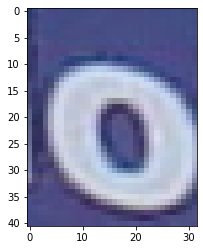

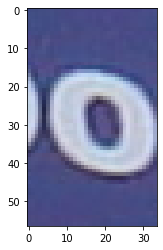

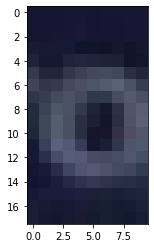

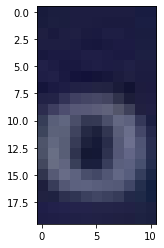

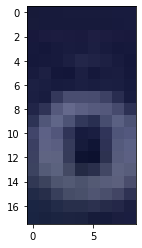

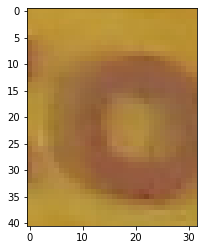

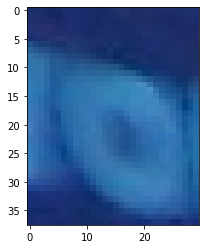

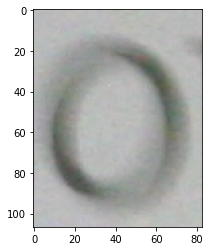

In [27]:
for path in path_o_paths:
    
    img = io.imread( path )
    plt.imshow(img)
    plt.show()
           

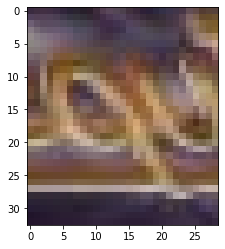

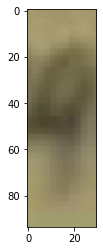

In [28]:
for path in path_q_paths:
    
    img = io.imread( path )
    plt.imshow(img)
    plt.show()

In [29]:

oq_imgs_list = [ ] 
oq_label_list = [ ] 


for path in path_o_paths:
    
    img = io.imread( path )
           
    img_resized =  resize( img , (30 , 30 , 3 ) )  
    
    img_gray =   color.rgb2gray( img_resized  )   
    
    img_reshaped =  img_gray.reshape( ( 900 ) )
    
    oq_imgs_list.append(  img_reshaped )
    
    oq_label_list.append( 0 )

In [30]:
print(len(oq_imgs_list[0]))
print(len(oq_imgs_list[1]))
print(len(oq_imgs_list))

900
900
110


In [31]:
print(oq_label_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [32]:

for path in path_q_paths:
    
    img = io.imread( path )
           
    img_resized =  resize( img , (30 , 30 , 3 ) )  
    
    img_gray =   color.rgb2gray( img_resized  )   
    
    img_reshaped =  img_gray.reshape( ( 900 ) )
    
    oq_imgs_list.append(  img_reshaped )
    
    oq_label_list.append( 1 )

In [33]:
print(len(oq_imgs_list[0]))
print(len(oq_imgs_list[1]))
print(len(oq_imgs_list))

900
900
112


In [34]:


X_train, X_test, y_train, y_test = train_test_split(  oq_imgs_list , oq_label_list, test_size=0.2, stratify=oq_label_list , random_state=42)

In [35]:

Logistic_model = LogisticRegression ( )


In [36]:
Logistic_model = Logistic_model.fit(  X_train ,  y_train  )

In [37]:

predict_y_test =  Logistic_model.predict( X_test  )

predict_y_train =  Logistic_model.predict( X_train  )

In [38]:
print( accuracy_score(   y_test ,  predict_y_test  )  )

print( accuracy_score(   y_train ,  predict_y_train  )  )

1.0
0.9775280898876404


In [39]:
def drawing_conf_matrix(  y_actual , y_predict ):
    
    print( "Classification Report" )
    print ( classification_report(  y_actual , y_predict  )  ) 
    conf_mat = confusion_matrix( y_actual,   y_predict )   
    print( "Confusion Matrix")
    print( conf_mat )
    sns.heatmap( conf_mat , annot= True  , fmt = "" )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23

Confusion Matrix
[[23]]


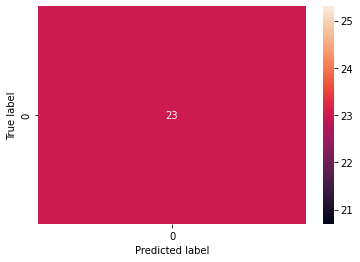

In [17]:
drawing_conf_matrix( y_test ,  predict_y_test )
    

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        87
           1       0.00      0.00      0.00         2

    accuracy                           0.98        89
   macro avg       0.49      0.50      0.49        89
weighted avg       0.96      0.98      0.97        89

Confusion Matrix
[[87  0]
 [ 2  0]]


C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


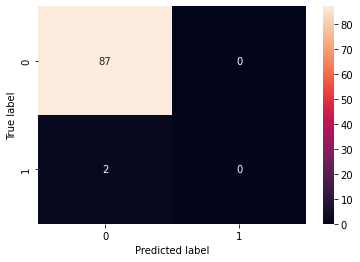

In [40]:
drawing_conf_matrix(  y_train ,  predict_y_train )

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
conf_matrix_test = confusion_matrix(  y_test ,  predict_y_test  )

In [43]:
Accu = np.sum( np.diag( conf_matrix_test) ) / np.sum( conf_matrix_test )

In [44]:
print(conf_matrix_test)

[[23]]


In [45]:
TP=22
FP=0
FN=1
TN=0

In [64]:
print(Accu)

1.0


In [65]:
dig=np.diag(conf_matrix_test)
print(dig)

[23]


In [66]:
summ=np.sum(conf_matrix_test)
print(summ)

23


In [67]:
# precision ,recall 
precision_o=TP/(TP+FN)
recall_o=TP/(TP+FP)
precision_q=TN/(TP+TN)
recall_q=TN/(TN+FN)
print(precision_o)
print(recall_o)
print(precision_q)
print(recall_q)

0.9565217391304348
1.0
0.0
0.0


In [32]:
conf_matrix_train = confusion_matrix(  y_train ,  predict_y_train  )

In [33]:
print(conf_matrix_train)

[[87  0]
 [ 2  0]]


In [34]:
Accu2 = np.sum( np.diag( conf_matrix_train) ) / np.sum( conf_matrix_train )

In [35]:
print(Accu2)

0.9775280898876404


In [36]:
TP=118
TN=36
FP=0
FN=7

In [37]:
precision_o=TP/(TP+FN)
recall_o=TP/(TP+FP)
precision_q=TN/(TP+TN)
recall_q=TN/(TN+FN)
print(precision_o)
print(recall_o)
print(precision_q)
print(recall_q)

0.944
1.0
0.23376623376623376
0.8372093023255814


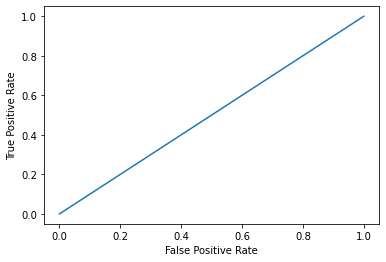

In [39]:

fpr, tpr, _ = metrics.roc_curve(y_train,  predict_y_train)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

C:\Users\20109\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


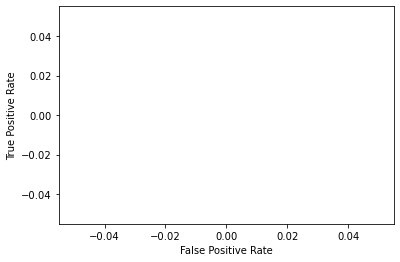

In [41]:

fpr, tpr, _ = metrics.roc_curve(y_test,  predict_y_test)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# second part (8,G)


In [42]:
path_8 = "E:\semester7\English\Img\BadImag\Bmp\Sample017\*"
path_g = "E:\semester7\English\Img\BadImag\Bmp\Sample009\*"

In [43]:

path_8_paths =  glob.glob(  path_8 )

path_g_paths =  glob.glob(  path_g )

In [44]:

print( len(path_8_paths  ))

print( len(path_g_paths  ))

77
10


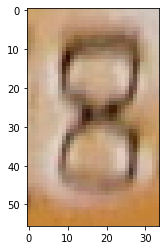

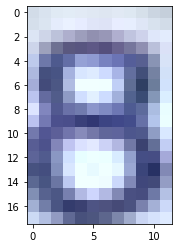

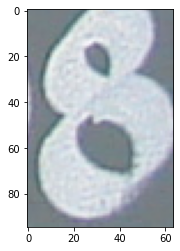

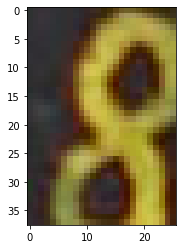

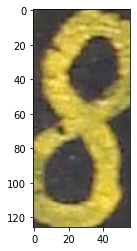

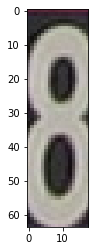

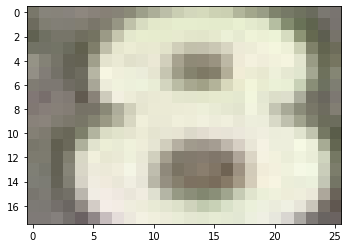

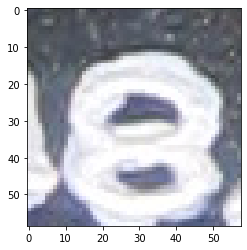

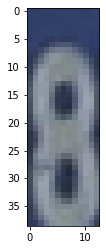

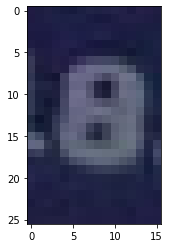

In [45]:
for path in path_g_paths:
    
    img = io.imread( path )
    plt.imshow(img)
    plt.show()
           

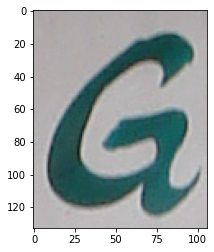

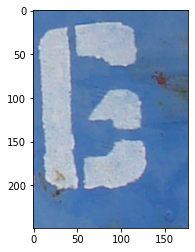

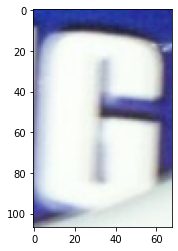

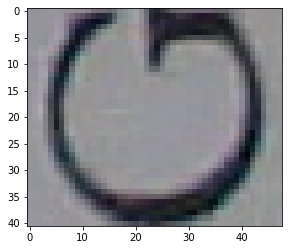

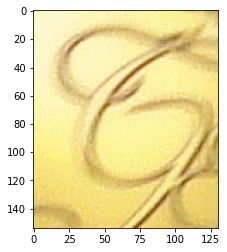

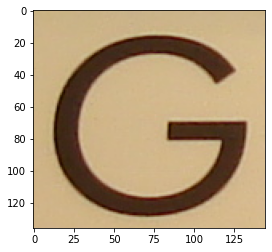

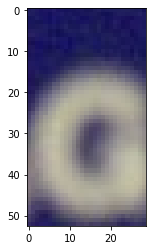

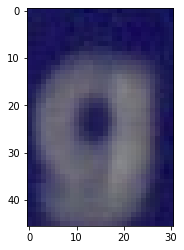

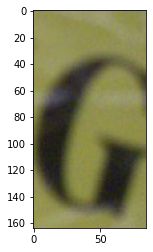

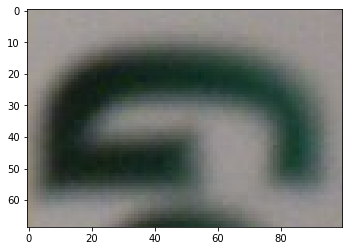

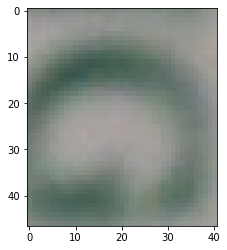

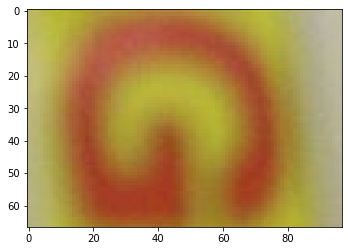

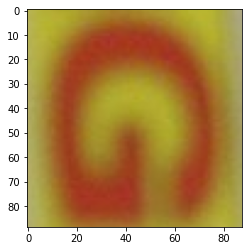

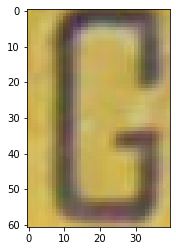

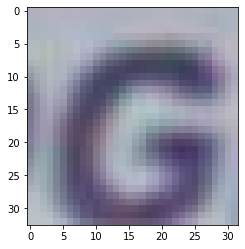

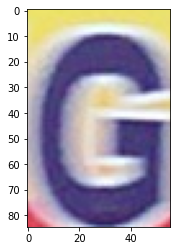

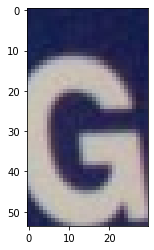

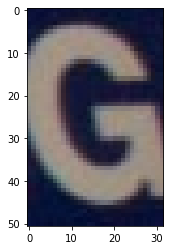

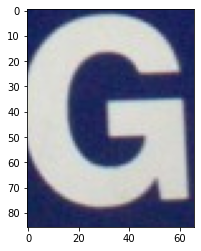

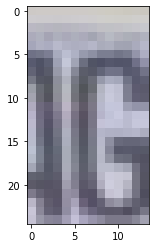

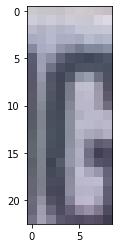

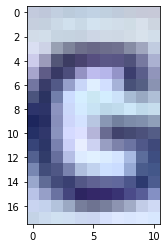

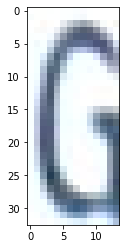

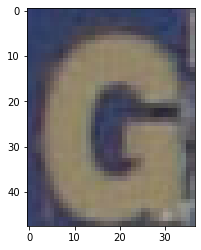

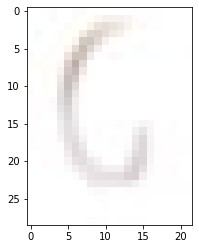

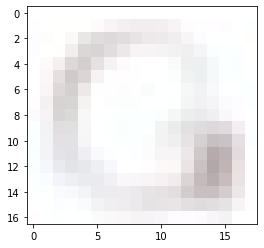

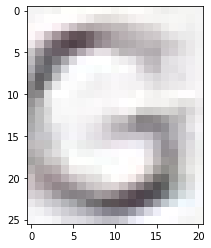

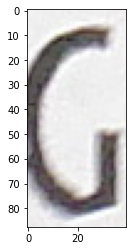

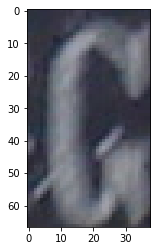

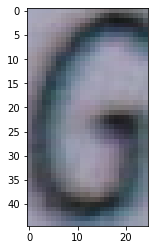

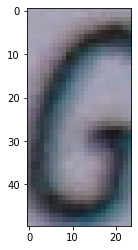

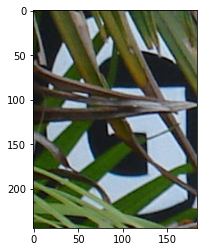

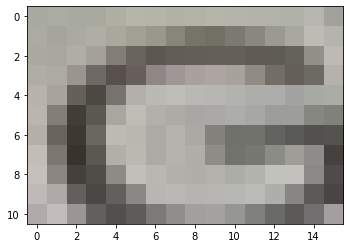

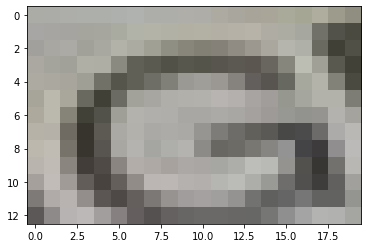

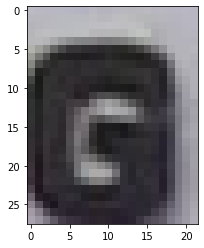

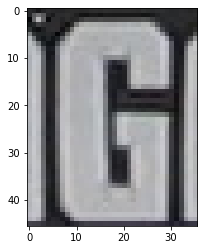

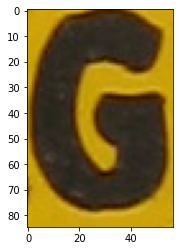

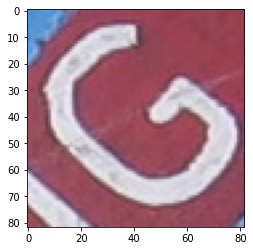

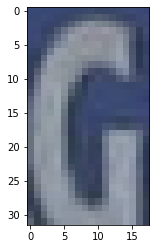

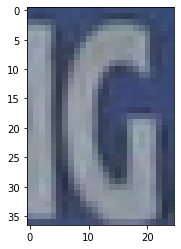

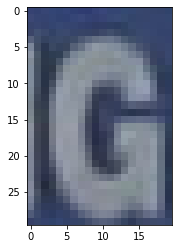

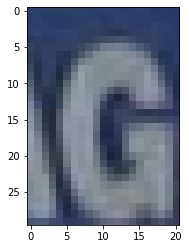

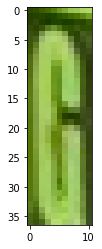

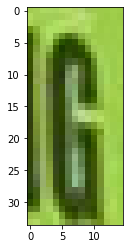

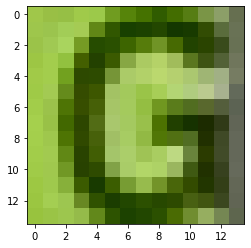

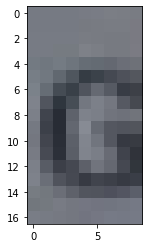

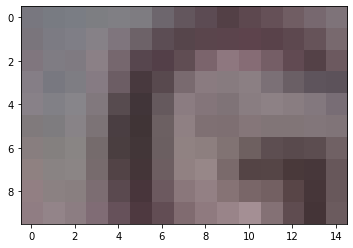

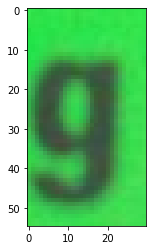

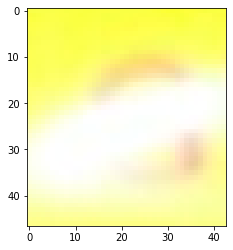

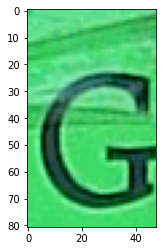

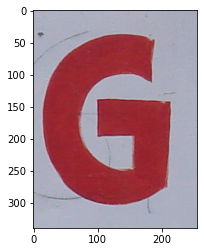

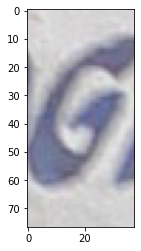

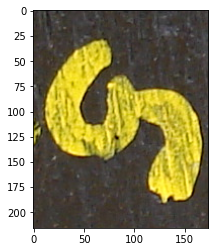

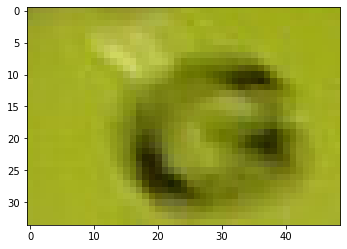

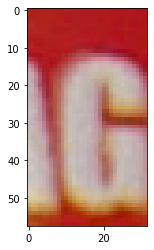

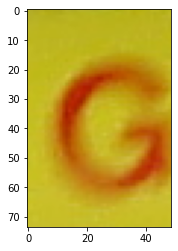

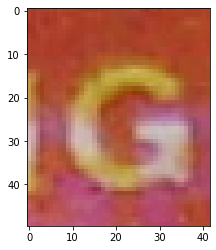

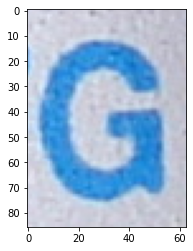

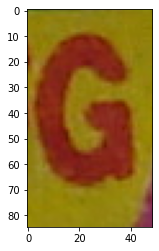

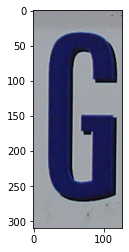

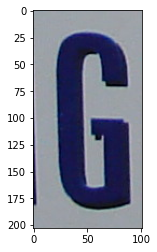

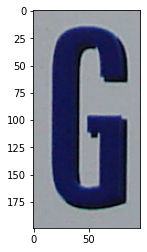

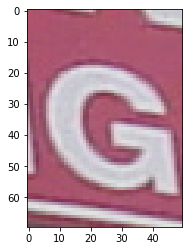

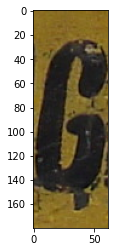

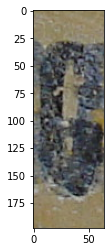

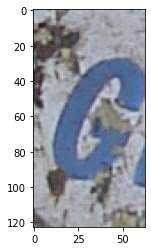

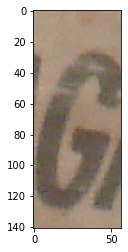

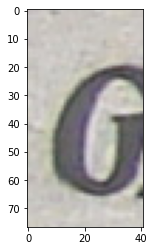

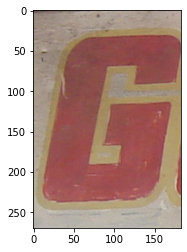

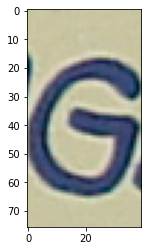

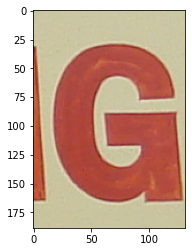

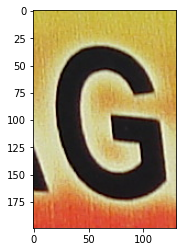

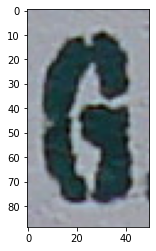

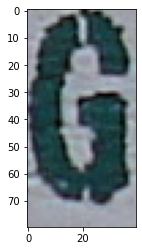

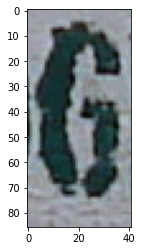

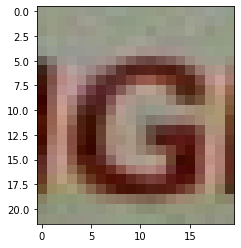

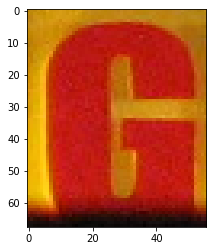

In [46]:
for path in path_8_paths:
    
    img = io.imread( path )
    plt.imshow(img)
    plt.show()

In [47]:
g8_imgs_list = [ ] 
g8_label_list = [ ] 


for path in path_g_paths:
    
    img = io.imread( path )
           
    img_resized =  resize( img , (30 , 30 , 3 ) )  
    
    img_gray =   color.rgb2gray( img_resized  )   
    
    img_reshaped =  img_gray.reshape( ( 900 ) )
    
    g8_imgs_list.append(  img_reshaped )
    
    g8_label_list.append( 0 )

In [48]:
g8_imgs_list = [ ] 
g8_label_list = [ ] 


for path in path_8_paths:
    
    img = io.imread( path )
           
    img_resized =  resize( img , (30 , 30 , 3 ) )  
    
    img_gray =   color.rgb2gray( img_resized  )   
    
    img_reshaped =  img_gray.reshape( ( 900 ) )
    
    g8_imgs_list.append(  img_reshaped )
    
    g8_label_list.append( 0 )

In [49]:
X_train, X_test, y_train, y_test = train_test_split(  oq_imgs_list , oq_label_list, test_size=0.2, stratify=oq_label_list , random_state=42)

In [50]:
Logistic_model = LogisticRegression ( )

In [51]:
Logistic_model = Logistic_model.fit(  X_train ,  y_train  )

In [52]:
predict_y_test =  Logistic_model.predict( X_test  )

predict_y_train =  Logistic_model.predict( X_train  )

In [53]:
print( accuracy_score(   y_test ,  predict_y_test  )  )

print( accuracy_score(   y_train ,  predict_y_train  )  )

1.0
0.9775280898876404


Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23

Confusion Matrix
[[23]]


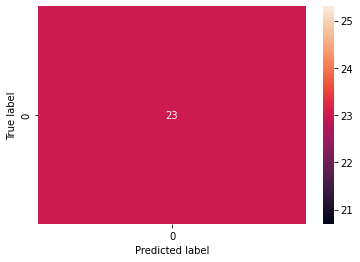

In [54]:
drawing_conf_matrix( y_test ,  predict_y_test )

In [55]:
print(conf_matrix_test)

[[23]]


In [56]:
TP=22
FP=0
FN=1
TN=0

In [57]:
# precision ,recall 
precision_8=TP/(TP+FN)
recall_8=TP/(TP+FP)
precision_g=TN/(TP+TN)
recall_g=TN/(TN+FN)
print(precision_8)
print(recall_8)
print(precision_g)
print(recall_g)

0.9565217391304348
1.0
0.0
0.0


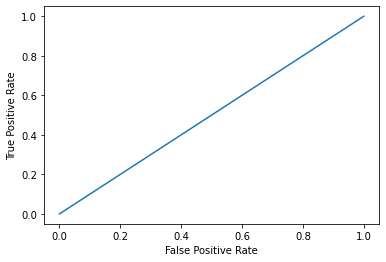

In [59]:
pr, tp, _ = metrics.roc_curve(y_train,  predict_y_train)

#create ROC curve
plt.plot(pr,tp)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
